# Seção 09 - Support Vector Machines (base censo)
Para esta seção, usarei a base de dados "census.csv" disponibilizada no curso do Professor Jones na UDEMY.

In [2]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
nomeDaBase = "../bases/census.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [4]:
df.head().T

0                    1                   2  \
age             39              50                   38                   
workclass        State-gov       Self-emp-not-inc     Private             
final-weight    77516           83311                215646               
education        Bachelors       Bachelors            HS-grad             
education-num   13              13                   9                    
marital-status   Never-married   Married-civ-spouse   Divorced            
occupation       Adm-clerical    Exec-managerial      Handlers-cleaners   
relationship     Not-in-family   Husband              Not-in-family       
race             White           White                White               
sex              Male            Male                 Male                
capital-gain    2174            0                    0                    
capital-loos    0               0                    0                    
hour-per-week   40              13                   40                   
native-country   United-States   United-States        United-States       
income           <=50K           <=50K                <=50K               

                                  3                    4  
age             53                   28                   
workclass        Private              Private             
final-weight    234721               338409               
education        11th                 Bachelors           
education-num   7                    13                   
marital-status   Married-civ-spouse   Married-civ-spouse  
occupation       Handlers-cleaners    Prof-specialty      
relationship     Husband              Wife                
race             Black                Black               
sex              Male                 Female              
capital-gain    0                    0                    
capital-loos    0                    0                    
hour-per-week   40                   40                   
native-country   United-States        Cuba                
income           <=50K                <=50K

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final-weight      32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loos      32561 non-null int64
hour-per-week     32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

count           mean            std      min       25%  \
age            32561.0  38.581647      13.640433      17.0     28.0       
final-weight   32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num  32561.0  10.080679      2.572720       1.0      9.0        
capital-gain   32561.0  1077.648844    7385.292085    0.0      0.0        
capital-loos   32561.0  87.303830      402.960219     0.0      0.0        
hour-per-week  32561.0  40.437456      12.347429      1.0      40.0       

                    50%       75%        max  
age            37.0      48.0      90.0       
final-weight   178356.0  237051.0  1484705.0  
education-num  10.0      12.0      16.0       
capital-gain   0.0       0.0       99999.0    
capital-loos   0.0       0.0       4356.0     
hour-per-week  40.0      45.0      99.0

In [7]:
dp.cardinalidade(df)

Atributo  Cardinalidade  \
6  sex             2               
8  income          2               
5  race            5               
4  relationship    6               
2  marital-status  7               
0  workclass       9               
3  occupation      15              
1  education       16              
7  native-country  42              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Valores  
6  [ Male,  Female]                                                                                                                                                                                                                                                                                                                                                                                                                                                               
8  [ <=50K,  >50K]                                                                                                                                                                                                                                                                                                                                                                                                                                                                
5  [ White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,  Other]                                                                                                                                                                                                                                                                                                                                                                                                             
4  [ Not-in-family,  Husband,  Wife,  Own-child,  Unmarried,  Other-relative]                                                                                                                                                                                                                                                                                                                                                                                                     
2  [ Never-married,  Married-civ-spouse,  Divorced,  Married-spouse-absent,  Separated,  Married-AF-spouse,  Widowed]                                                                                                                                                                                                                                                                                                                                                             
0  [ State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  ?,  Self-emp-inc,  Without-pay,  Never-worked]                                                                                                                                                                                                                                                                                                                                                            
3  [ Adm-clerical,  Exec-managerial,  Handlers-cleaners,  Prof-specialty,  Other-service,  Sales,  Craft-repair,  Transport-moving,  Farming-fishing,  Machine-op-inspct,  Tech-support,  ?,  Protective-serv,  Armed-Forces,  Priv-house-serv]                                                                                                                                            

### Problemas encontrados na base:

Não foram encontrados problemas na base. Não há valores nulos e nenhum valor incoerente.
**Um ponto de atenção é o valor "?" nos atributos "workclass", "occupation" e "native-country".**

#### OBSERVAÇÃO:

No mundo real, os problemas com as bases são muito piores. Deve-se ter muita atenção pois os dados podem não representar a realidade do processo.

## 1) Tratando o df para ser consumido pelo modelo

In [8]:
# Copiando df original para um novo df (df_tratado) e substituindo os valores negativos pela média dos positivos.

df_tratado = df.copy()

df_tratado.replace(to_replace="?", value=np.nan, inplace=True)

lista_atributos_categoricos = list(df_tratado.select_dtypes(exclude=["int64", "float64"]).columns)

state_dummies = pd.get_dummies(df_tratado[lista_atributos_categoricos], drop_first=True)
df_tratado.drop(lista_atributos_categoricos, axis=1, inplace=True)

df_tratado = pd.concat([df_tratado, state_dummies], axis=1)

df_tratado.sample(10).T

9549   31016   15140   30161  \
age                                         69      35      32      34       
final-weight                                476653  190895  154950  177733   
education-num                               13      14      10      5        
capital-gain                                0       0       0       0        
capital-loos                                0       0       0       0        
hour-per-week                               20      40      30      35       
workclass_ Federal-gov                      0       0       0       0        
workclass_ Local-gov                        0       0       0       0        
workclass_ Never-worked                     0       0       0       0        
workclass_ Private                          0       0       0       1        
workclass_ Self-emp-inc                     0       0       0       0        
workclass_ Self-emp-not-inc                 0       1       1       0        
workclass_ State-gov                        0       0       0       0        
workclass_ Without-pay                      0       0       0       0        
education_ 11th                             0       0       0       0        
education_ 12th                             0       0       0       0        
education_ 1st-4th                          0       0       0       0        
education_ 5th-6th                          0       0       0       0        
education_ 7th-8th                          0       0       0       0        
education_ 9th                              0       0       0       1        
education_ Assoc-acdm                       0       0       0       0        
education_ Assoc-voc                        0       0       0       0        
education_ Bachelors                        1       0       0       0        
education_ Doctorate                        0       0       0       0        
education_ HS-grad                          0       0       0       0        
education_ Masters                          0       1       0       0        
education_ Preschool                        0       0       0       0        
education_ Prof-school                      0       0       0       0        
education_ Some-college                     0       0       1       0        
marital-status_ Married-AF-spouse           0       0       0       0        
marital-status_ Married-civ-spouse          1       1       1       0        
marital-status_ Married-spouse-absent       0       0       0       0        
marital-status_ Never-married               0       0       0       0        
marital-status_ Separated                   0       0       0       1        
marital-status_ Widowed                     0       0       0       0        
occupation_ Adm-clerical                    0       0       0       0        
occupation_ Armed-Forces                    0       0       0       0        
occupation_ Craft-repair                    0       0       1       0        
occupation_ Exec-managerial                 0       0       0       0        
occupation_ Farming-fishing                 0       0       0       0        
occupation_ Handlers-cleaners               0       0       0       0        
occupation_ Machine-op-inspct               0       0       0       1        
occupation_ Other-service                   0       0       0       0        
occupation_ Priv-house-serv                 0       0       0       0        
occupation_ Prof-specialty                  0       0       0       0        
occupation_ Protective-serv                 0       0       0       0        
occupation_ Sales                           0       1       0       0        
occupation_ Tech-support                    0       0       0       0        
occupation_ Transport-moving                0       0       0       0        
relationship_ Not-in-family                 0       0       0       0        
relationship_ Other-relative                0       0       0       

## 2) Aplicação da Aprendizagem por árvores de decisão

### 2.1) Usando *train_test_split*  

In [9]:
# Separando os fatores/previsores da resposta/target:
    
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

## Escalonamento
Nesse algoritmo é importante executar o escalonamento.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.



In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Aplicando o modelo

In [15]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear', random_state=0)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

In [16]:
y_pred = classificador.predict(x_test)

### Verificando o como o modelo se saiu

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    confusion_matrix(y_test, y_pred)))

Métrica 1 (Acurácia): 0.856441.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.76      0.59      0.67      1571

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513
.
Métrica 2 (Relatório de classificação):
[[4646  296]
 [ 639  932]].


Normalized confusion matrix
[[0.94010522 0.05989478]
 [0.40674729 0.59325271]]


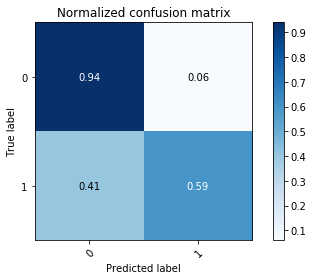

In [18]:
plot_confusion_matrix_2(y_test, y_pred, normalize=True);

### Agora, usando validação cruzada.

In [19]:
resultados = cross_val_score(classificador, x, y, cv = 10)

print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))

Acurácia média: 0.851 ± 0.00469.
